In [1]:
# To ignore all the warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import all the libraries

import numpy as np
import pandas as pd

import tensorflow as tf
import keras

import matplotlib.pyplot as plt

2024-03-12 20:11:30.563345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# check tf and keras version

print("TensorFlow version is:", tf.__version__)
print("Keras version is:", keras.__version__)

TensorFlow version is: 2.15.0
Keras version is: 2.15.0


***Load the dataset and analyze it***

In [4]:
hd_df =pd.read_csv("/Users/sayedrizwan/Downloads/Heart_disease_cleveland_new.csv")

In [5]:
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [6]:
hd_df.shape

(303, 14)

In [7]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


***PREPARING THE DATA***

We have to fing the presence of heart disease. 

So we will keep that column in a separate dataframe.

x will be our input dataframe.

y will be our target dataframe.

In [8]:
x = hd_df.drop("target", axis = 1)
y = hd_df["target"]

***Split data in train and test set***

***x_train:*** independent input data for training the model. 

***y_train:*** dependent output data for training the model. 

***x_test:*** independent input data for testing the model. It is used to predict the values.

***y_test:*** dependent outplu data. It is used to compare it with the predicted values.

***test_size = 0.20:*** the data is split. 20% data will go in test set and 80% will go in test set.

***random_state = 42:*** it is used a s refernce. Everytime this code is run, same data is loaded in train and test set.

In [9]:
# import sk learn library for splitting the data
from sklearn.model_selection import train_test_split

In [10]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [11]:
# check shape of the data frame
X_train.shape, X_test.shape

((242, 13), (61, 13))

***Building a binary classification neural network*** 

1. Defining a neural network.
2. Compiling a neural network.
3. Training a neural network.
4. Evaluating a neural network.
5. Predicting a neural network.

***Our Model Architecture***

The architecture is build considering 2 important aspects

1. No. of layers that needs to be created.
2. No of neurons in each layer

For our layer we will be considering the following aspects:

1. input = no. of features in input layer = 13
2. No. of neurons in first dense layer = 32
3. No. of neurons in second dense layer = 16
4. No. of neurons in third dense layer = 8
5. No. of neurons in output layer = 1

In [12]:
# importing required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [13]:
# Defining the model
model = Sequential()

In [14]:
# Adding input layers
input_dims = X_train.shape[1]
model.add(tf.keras.Input(shape =(input_dims), name = "input_layer"))

In [15]:
# Adding hidden layers
model.add(Dense(32, activation = "relu", name = "hidden_layer1"))
model.add(Dense(16, activation = "relu", name = "hidden_layer2"))
model.add(Dense(8, activation = "relu", name = "hidden_layer3"))

In [16]:
# Adding output layer
model.add(Dense(1, activation = "sigmoid", name = "output_layer"))

In above code we have created 4 dense layers.

***Relu Activation Function is used in hidden layers***

ReLU, which stands for Rectified Linear Unit, is an activation function commonly used in artificial neural networks. ReLU tends to produce sparse activations. Neurons that receive negative input values become inactive (output zero), and only neurons with positive inputs contribute to the network's output. This sparsity can be beneficial in certain scenarios. ReLU is widely used as an activation function in the hidden layers of deep neural networks. Its simplicity and effectiveness have contributed to its popularity in recent years.

***Sigmoid Activation Function is used in output layer.***

The sigmoid function, also known as the logistic function, is a common activation function used in artificial neural networks. The sigmoid function has an S-shaped curve, which makes it particularly useful for binary classification problems. The output is close to 0 for very negative inputs, close to 1 for very positive inputs, and smoothly transitions between the two for inputs around 0. The sigmoid function is commonly used in the output layer of a neural network for binary classification problems. The output can be interpreted as the probability of belonging to the positive class.

In [17]:
# Creating Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 32)                448       
                                                                 
 hidden_layer2 (Dense)       (None, 16)                528       
                                                                 
 hidden_layer3 (Dense)       (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


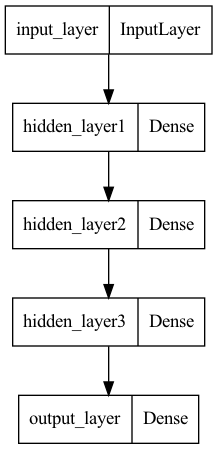

In [18]:
# Plotting the Model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [19]:
#import optimizer
from tensorflow.keras.optimizers import RMSprop

In [20]:
# define the optimizer
optimizer = RMSprop(0.001) #etting the learning rate at 0.001

In [21]:
#compile the model
model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

***Binary_Crossentopy***

Binary Crossentropy, often referred to as log loss or logistic loss, is a loss function commonly used in binary classification problems. It measures the difference between the true labels and the predicted probabilities for a binary classification task. Binary Crossentropy is a commonly used loss function for binary classification tasks, measuring the discrepancy between predicted probabilities and true labels. 

***accuracy metrics***

Accuracy is a commonly used metric for evaluating classification models. It measures the overall correctness of predictions by comparing the number of correct predictions to the total number of predictions.

***TRAINING THE MODEL***

In [22]:
multiclass_classifier = model.fit(X_train, y_train, validation_split=0.2, epochs=20,
                                  batch_size = 128, verbose =1)

# batch_size should be in 2^n form, where n= 1,2,3....

Epoch 1/20
2/2 [==============================] - 1s 212ms/step - loss: 3.4966 - accuracy: 0.4093 - val_loss: 1.7384 - val_accuracy: 0.4286
Epoch 2/20
2/2 [==============================] - 0s 32ms/step - loss: 1.5950 - accuracy: 0.3679 - val_loss: 1.3948 - val_accuracy: 0.3878
Epoch 3/20
2/2 [==============================] - 0s 39ms/step - loss: 1.1499 - accuracy: 0.4715 - val_loss: 1.2004 - val_accuracy: 0.4082
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.9930 - accuracy: 0.4870 - val_loss: 1.1630 - val_accuracy: 0.4286
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 1.0960 - accuracy: 0.4352 - val_loss: 1.2609 - val_accuracy: 0.5918
Epoch 6/20
2/2 [==============================] - 0s 35ms/step - loss: 0.8933 - accuracy: 0.5699 - val_loss: 1.0541 - val_accuracy: 0.4286
Epoch 7/20
2/2 [==============================] - 0s 61ms/step - loss: 0.8405 - accuracy: 0.4922 - val_loss: 1.0272 - val_accuracy: 0.4490
Epoch 8/20
2/2 [==========

***Evaluate Trained Neuron Network***

In [23]:
# Evaluating neural network using test dataset

score = model.evaluate(x = X_test, y=y_test, verbose=0)

In [24]:
print("Test Score", score[0])
print("Test Accuracy", score[1])

Test Score 0.5893081426620483
Test Accuracy 0.6721311211585999


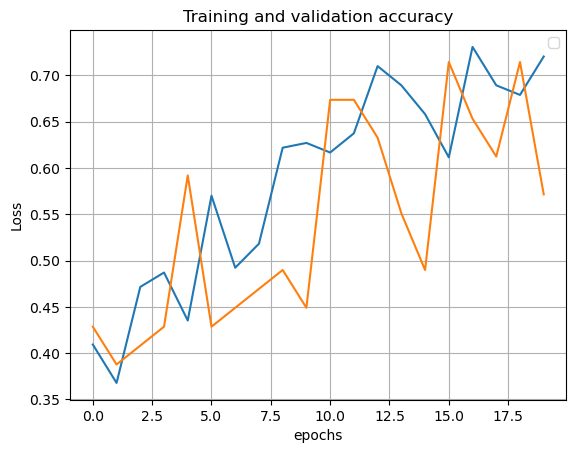

In [25]:
# plotting Training and validation accuracy

plt.plot(multiclass_classifier.history["accuracy"])
plt.plot(multiclass_classifier.history["val_accuracy"])
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend("Train", "Validation")
plt.grid()
plt.show()

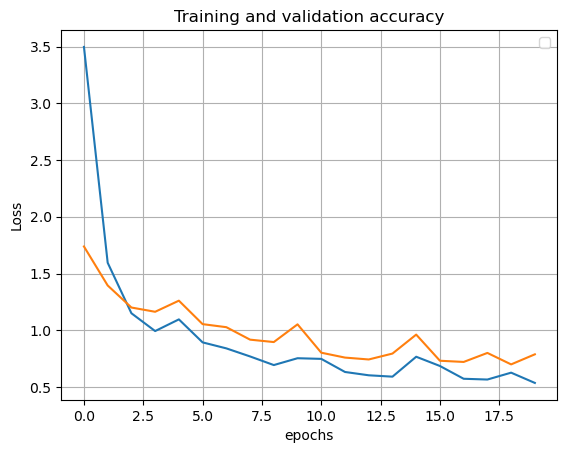

In [26]:
# plotting Training and validation loss

plt.plot(multiclass_classifier.history["loss"])
plt.plot(multiclass_classifier.history["val_loss"])
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend("Train", "Validation")
plt.grid()
plt.show()

***Prediction using training dataset***

In [27]:
y_pred = model.predict(X_test)
y_pred[:10]

2/2 [==============================] - 0s 3ms/step


array([[0.3071177 ],
       [0.9103194 ],
       [0.81196785],
       [0.52289534],
       [0.90952843],
       [0.69354254],
       [0.96370274],
       [0.97990763],
       [0.10640417],
       [0.5275621 ]], dtype=float32)

In [28]:
# decision boundary threshold, if probablility > 0.5 then risk of heart disease, or no heart disease

y_pred = (y_pred>0.5)
y_pred[:15]

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True]])

False implies no heart disease, probablity is less than 0.5

True implies heart disease, probablity is greater than 0.5

***Plot Confusion Matrix and Classification report***

***CONFUSION MATRIX***

A confusion matrix is a table that is often used to evaluate the performance of a classification model on a set of labeled data. It provides a detailed breakdown of the model's predictions, showing the number of true positive, true negative, false positive, and false negative instances. The confusion matrix is a valuable tool for understanding the strengths and weaknesses of a classification model.

Here are the key components of a confusion matrix:

***True Positive (TP):*** Instances where the model correctly predicts the positive class.

***True Negative (TN):*** Instances where the model correctly predicts the negative class.

***False Positive (FP):*** Instances where the model incorrectly predicts the positive class (Type I error).

***False Negative (FN):*** Instances where the model incorrectly predicts the negative class (Type II error).

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve
import seaborn as sns

In [43]:
# defining function

def plot_confusion_matrix (y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)
    labels = ["Not Present", "Present"]

    # color map
    cmap = sns.light_palette("blue")
    
    # Plotting Confusion Matrix
    
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=cm, cmap=cmap, fmt=".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.title("Confusion Matrix")
    plt.show()
    
    print()
    print("_"*100)
    print("Classificarion Report:\n", classification_report(y_test, y_predict))
    print("Accuracy Score:" +str(accuracy_score(y_test, y_predict)*100))
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    print("AUC Score:", auc(fpr, tpr))

In [35]:
# shape of dataset
y_test.shape

(61,)

In [38]:
#Distribution of each class
y_test.value_counts()

1    32
0    29
Name: target, dtype: int64

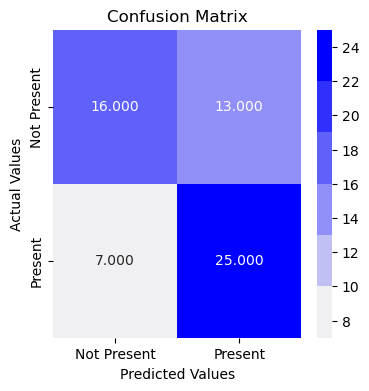


____________________________________________________________________________________________________
Classificarion Report:
               precision    recall  f1-score   support

           0       0.70      0.55      0.62        29
           1       0.66      0.78      0.71        32

    accuracy                           0.67        61
   macro avg       0.68      0.67      0.66        61
weighted avg       0.68      0.67      0.67        61

Accuracy Score:67.21311475409836
AUC Score: 0.6664870689655172


In [44]:
# Plotting confusion matrix
plot_confusion_matrix(y_test, y_pred)